# Phase-estimation and Factoring

In [18]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math

psi1 = Statevector([math.cos(math.pi / 8), math.sin(math.pi / 8), ])
psi2 = Statevector([math.cos(5 * math.pi / 8), math.sin(5 * math.pi / 8)])

H = Operator(psi1) - Operator(psi2)

display(array_to_latex(H))

<IPython.core.display.Latex object>

In [19]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7

qc = QuantumCircuit(2, 1)

qc.x(1)
qc.barrier()

qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

qc.measure(0, 0)

display(qc.draw())

░ ┌───┐          ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─■────────┤ H ├─░─┤M├
     ┌───┐ ░ └───┘ │P(7π/5) └───┘ ░ └╥┘
q_1: ┤ X ├─░───────■──────────────░──╫─
     └───┘ ░                      ░  ║ 
c: 1/════════════════════════════════╩═
                                     0

In [20]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

{0: 0.345491502812526, 1: 0.654508497187474}

In [21]:
display({
    0: cos(pi * theta) ** 2,
    1: cos(pi * theta) ** 2
})

{0: 0.34549150281252616, 1: 0.34549150281252616}

In [22]:
from math import pi
from qiskit import QuantumCircuit

theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# Initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# Controlled Unitary Gates
qc.cp(2 * pi * theta, 0, 2)
qc.cp(2 * pi * (2 * theta), 1, 2)
qc.barrier()

# Implementation of the inverse of the Two-qubit QFT
qc.swap(0, 1)
qc.h(0)
qc.cp(-pi / 2, 0, 1)
qc.h(1)
qc.barrier

# Measurements
qc.measure([0, 1], [0, 1])
display(qc.draw())


░ ┌───┐ ░                       ░    ┌───┐               ┌─┐   
q_0: ──────░─┤ H ├─░──■────────────────────░──X─┤ H ├─■─────────────┤M├───
           ░ ├───┤ ░  │                    ░  │ └───┘ │P(-π/2) ┌───┐└╥┘┌─┐
q_1: ──────░─┤ H ├─░──┼─────────■──────────░──X───────■────────┤ H ├─╫─┤M├
     ┌───┐ ░ └───┘ ░  │P(7π/5)  │P(14π/5)  ░                   └───┘ ║ └╥┘
q_2: ┤ X ├─░───────░──■─────────■──────────░─────────────────────────╫──╫─
     └───┘ ░       ░                       ░                         ║  ║ 
c: 2/════════════════════════════════════════════════════════════════╩══╩═
                                                                     0  1

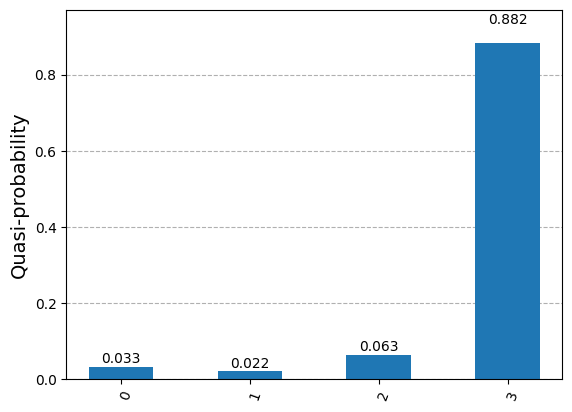

In [23]:
from qiskit.visualization import plot_histogram

result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [24]:
from qiskit.circuit.library import QFT

display(QFT(4).decompose().draw())

┌───┐»
q_0: ──────────────────────────────────────■─────────────■────────■───────┤ H ├»
                                           │       ┌───┐ │        │P(π/2) └───┘»
q_1: ────────────────────■────────■────────┼───────┤ H ├─┼────────■─────────X──»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)            │  »
q_2: ──────■───────┤ H ├─┼────────■────────┼─────────────■──────────────────X──»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                             »
q_3: ┤ H ├─■─────────────■─────────────────■───────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

In [28]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = 0.7
m = 3  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw())

░ ┌───┐                                                  »
Control_0: ──────░─┤ H ├─■────────────────────────────────────────────────»
                 ░ ├───┤ │                                                »
Control_1: ──────░─┤ H ├─┼─────────■─────────■────────────────────────────»
                 ░ ├───┤ │         │         │                            »
Control_2: ──────░─┤ H ├─┼─────────┼─────────┼─────────■─────────■────────»
           ┌───┐ ░ └───┘ │P(7π/5)  │P(7π/5)  │P(7π/5)  │P(7π/5)  │P(7π/5) »
      |ψ>: ┤ X ├─░───────■─────────■─────────■─────────■─────────■────────»
           └───┘ ░                                                        »
 Result: 3/═══════════════════════════════════════════════════════════════»
                                                                          »
«                                ░ ┌──────────┐┌─┐      
«Control_0: ─────────────────────░─┤0         ├┤M├──────
«                                ░ │          │└╥┘┌─┐   
«Control_1: ─────────────────────░─┤1 IQFT_dg ├─╫─┤M├───
«                                ░ │          │ ║ └╥┘┌─┐
«Control_2: ─■─────────■─────────░─┤2         ├─╫──╫─┤M├
«            │P(7π/5)  │P(7π/5)  ░ └──────────┘ ║  ║ └╥┘
«      |ψ>: ─■─────────■─────────░──────────────╫──╫──╫─
«                                ░              ║  ║  ║ 
« Result: 3/════════════════════════════════════╩══╩══╩═
«                                               0  1  2

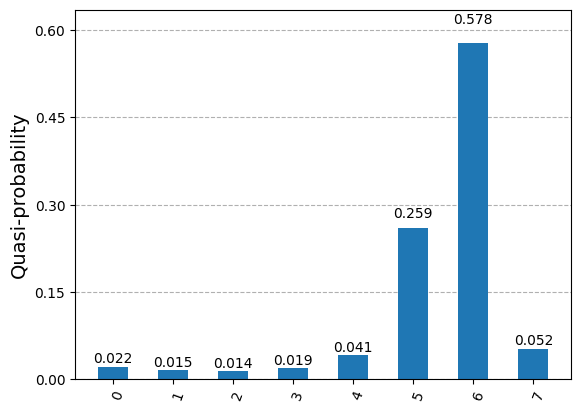

In [29]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [30]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated Theta: {most_probable/2**m}")

Most probable output: 6
Estimated Theta: 0.75


In [36]:
N = 21
a = 18
max_power = 12

print("k \t a^k \n")
for k in range(1, max_power + 1):
    print(
        "2%d \t 2%d" % (k, a**k % N)
    )

k 	 a^k 

21 	 218
22 	 29
23 	 215
24 	 218
25 	 29
26 	 215
27 	 218
28 	 29
29 	 215
210 	 218
211 	 29
212 	 215


In [38]:
def c_amod15(a):
    """
    Controlled Multiplication by a mod 15
    This is hard-coded for simplicity
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15.")
    U = QuantumCircuit(4)
    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U


In [39]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = QuantumRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)
    
    # Phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True
            )
    
    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

In [40]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)
display(psi_prep.draw())

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────